## Ejercicio 1

In [33]:
using SymPy

In [57]:
function Newton(f,x0,t)
# listx=[x] 
    d(x,t)=diff(f(x,t),x) 
    for i in 1:40 
        x0=x0-(f(x0,t)/d(x0,t)) 
        #push!(listx,x)
    end
   return x0
end    

function EulerImp(f,x0,t0,t,h)
    listt=t0:h:t
    listx=[x0]
    for i in 1: length(listt)-1
        g(x,t)=x-(h*f(x,listt[i]))
        x0=x0+(h*(f(Newton(g,Float64(x0),listt[i]),listt[i])))
        
        push!(listx,x0)
    end
    return listt, listx
    
end
        
    

EulerImp (generic function with 1 method)

In [58]:
f(x,t)=-2.5x


f (generic function with 2 methods)

In [59]:
EulerImp(f,1.0,0.0,8.0,0.2)

LoadError: [91mMethodError: no method matching diff(::Float64, ::Float64)[0m
Closest candidates are:
  diff([91m::AbstractArray{SymPy.Sym,1}[39m, ::Any...; kwargs...) at /home/juser/.julia/v0.6/SymPy/src/math.jl:151
  diff([91m::AbstractArray{SymPy.Sym,2}[39m, ::Any...; kwargs...) at /home/juser/.julia/v0.6/SymPy/src/math.jl:152
  diff([91m::SymPy.Sym[39m, ::Any...; kwargs...) at /home/juser/.julia/v0.6/SymPy/src/math.jl:140[39m

## Ejercicio 2

In [9]:
#copié el mismo ejercicio1 de la tarea 11 y sólo modifiqué la fórmula del método
function EulerMedio(f,x0,t0,t,h)
 listt=t0:h:t   
    listx=[x0]
    for i in 1:length(listt)-1
       x0=x0+h*f(x0+(h/2)f(x0,listt[i]),listt[i]+h/2) #esta es la fórmula del Método de Euler de punto medio
        push!(listx,x0)
    end
    return listt,listx
end

EulerMedio (generic function with 1 method)

In [10]:
f(x,t)=-2.5x  #utilicéla misma función que la tarea 11
EulerMedio(f,1.0,0.0,8.0,0.1)

(0.0:0.1:8.0, [1.0, 0.78125, 0.610352, 0.476837, 0.372529, 0.291038, 0.227374, 0.177636, 0.138778, 0.10842  …  2.44395e-8, 1.90934e-8, 1.49167e-8, 1.16537e-8, 9.10442e-9, 7.11283e-9, 5.5569e-9, 4.34133e-9, 3.39166e-9, 2.64973e-9])

## Ejercicio 3

In [5]:
function RK4(f,x0,t0,t,h)
     listt=t0:h:t   
    listx=[x0]
    for i in 1:length(listt)-1
        k1=f(listt[i],x0)
        k2=f(listt[i]+(h/2),x0+(k1*h/2))
        k3=f(listt[i]+(h/2),x0+(k2*h/2))
        k4=f(listt[i],x0+(h*k3))
       x0=x0+((h/6)*(k1+(2*k2)+(2k3)+k4)) 
        push!(listx,x0)
    end
    return listt,listx
end

RK4 (generic function with 1 method)

In [6]:
f(x,t)=-2.5x
RK4(f,1.0,0.0,8.0,0.1)

(0.0:0.1:8.0, [1.0, 0.991667, 0.958333, 0.9, 0.816667, 0.708333, 0.575, 0.416667, 0.233333, 0.025  …  -61.7167, -63.5, -65.3083, -67.1417, -69.0, -70.8833, -72.7917, -74.725, -76.6833, -78.6667])

## Ejercicio 4

## Ejercicio 5

Sea $$g(x,t)=\frac{dx}{dt}=\frac{2x-18 t}{1+t}$$

In [7]:
g(x,t)=(2x-18t)/(1+t) 
exacta(t)=4+8*t-5t^2

exacta (generic function with 1 method)

In [17]:
using Plots

  likely near /opt/julia_packages/.julia/v0.6/Plots/src/series.jl:91
  likely near /opt/julia_packages/.julia/v0.6/Plots/src/series.jl:91



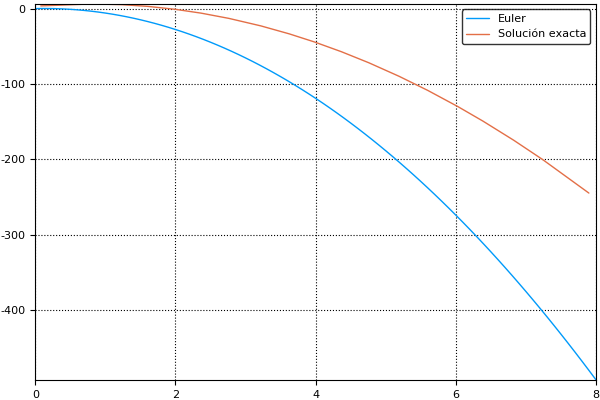

In [22]:
plot(EulerMedio(g,1.0,0.0,8.0,0.1),label="Euler")
plot!(exacta,label="Solución exacta")


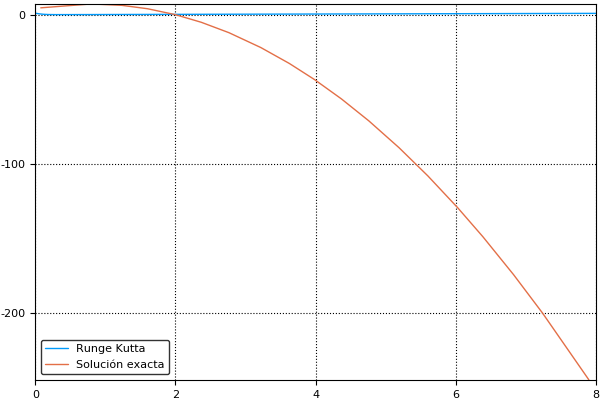

In [32]:
plot(RK4(g,1.0,0.0,8.0,0.01),label="Runge Kutta")
plot!(exacta,label="Solución exacta")